In [1]:
from models import *
from datetime import datetime
from random import random
from time import sleep
from functions import GetCurrentDate
import pandas as pd
import numpy as np
import tensorflow as tf
import shutil
import os

# Initiate parameters
start_date = "2019-12-30"  #"2018-12-31"  
end_date = GetCurrentDate() #'2023-04-30'

ticker = 'mrk'
period = "1wk" #1wk
shuffle = False
condition = False

# Sentiment types... APISentiment	VaderSentiment	CombinedVaderSentiment RobertaLargeSentiment #TwitterSentiment #ChatGPT_Sentiment
sentiment = True
sentiment_type = 'ChatGPT_Sentiment'
aggr_function = 'median'

#Setup windows
formation_window = 4
target_window = 1

#Split Ratios
split_ratio = 0.70
test_ratio = 0.15
validation_ratio = 0.15

if condition:
    print("--> Condition is ENABLED")
# EMA indicators
indicator1 = 4#5
indicator2 = 14#8
indicator3 = 32#21

#HPQ 1 2 3
#TSLA: 1 2 3
#MRK: 4 14 32

# training batches
batch_size_train = 6
batch_size_valid = 2

#Clear Folders
delete = True
export_excels = False

#__________________________________________________
# Do not change
api_key = ''
window_size = formation_window + 1

if sentiment == False:
    news_df = None
if sentiment_type == 'TwitterSentiment':
    twitter = True
else:
    twitter = False

if sentiment_type == 'ChatGPT_Sentiment':
    gpt_news_json = f"ChatGPT\{ticker}_chatgpt_news.json"

excel_reports = ".\Excel reports"
temp = f".\TempFiles\{ticker}"

#Delete folders
if delete == True:
    try:
        shutil.rmtree(excel_reports)
        shutil.rmtree(temp)
        
    except:
        pass
    # Create folder, if exist pass exception
    try:
        os.mkdir("Excel reports")
        os.mkdir(f"TempFiles\{ticker}")
    except:
        pass

# Print stuffs
print("\nTensorflow version: ", tf.__version__)
print("Numpy version: ", np.__version__)
print("\nwindow size: ", window_size)
print("formation_window: ", formation_window)
print("target_window: ", target_window)
print("chart period: ", period)


End Date:  2023-06-18

Tensorflow version:  2.9.1
Numpy version:  1.23.1

window size:  5
formation_window:  4
target_window:  1
chart period:  1wk


In [2]:
if sentiment == True:

    from sentiment import GetNews

    GetNewsAPI = GetNews()

    GetNewsAPI.fit(ticker=ticker, start_date=start_date, end_date=end_date,
                   n_news=1000, token=api_key, offset=0, export_excel=True, twitter=twitter,temp_folder=temp)
    news_df = GetNewsAPI.transform()
news_df

d:\MachineLearning\DataScience\VSCode\04_StockPrediction\04_stockprediction\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\z0040jeb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\z0040jeb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


--------> GetNews completed



,Date,Title,Content,APISentiment,VaderSentiment,CombinedVaderSentiment
0,2023-06-16,Merck Completes Acquisition of Prometheus Bios...,Acquisition delivers industry-leading research...,0.996,0.0000,0.9960
1,2023-06-16,Merck's Keytruda Combo Therapy Hits Primary Go...,Merck & Co Inc (NYSE: MRK) announced topline d...,0.990,-0.6597,0.3303
2,2023-06-16,Merck is Collaborating To Help Make Cancer Car...,"NORTHAMPTON, MA / ACCESSWIRE / June 16, 2023 /...",0.243,0.1280,0.3710
3,2023-06-16,KEYTRUDA® (pembrolizumab) Plus Trastuzumab and...,Based on a subgroup analysis by PD-L1 expressi...,-1.000,0.2500,-0.7500
4,2023-06-15,Pet Insect Repellent Market Size is projected ...,"New York, United States, June 15, 2023 (GLOB...",0.999,0.2023,1.2013
...,...,...,...,...,...,...
995,2022-07-11,COVID subvariants: Vaccinated individuals ‘sti...,Children's Hospital of Philadelphia Dr. Paul O...,0.999,0.4939,1.4929
996,2022-07-11,Henry Schein's (HSIC) New Buyout Expands Its S...,"Henry Schein, Inc. HSIC recently acquired 100%...",0.999,0.1027,1.1017
997,2022-07-11,Biotech Stocks Are Up by Double Digits. It’s S...,Expectations that Merck will buy Seagen in a $...,0.000,0.0000,0.0000
998,2022-07-11,"Quest Diagnostics (DGX), CDC Sign New COVID-19...",Quest Diagnostics Incorporated DGX recently jo...,0.995,0.0000,0.9950


In [3]:
import json
import openai
import tiktoken
import json
import re
import ast

######################################################################################################
def CallChatGPT(prompt):
    def get_completion(prompt, model="gpt-3.5-turbo"): #gpt-4-0613 gpt-3.5-turbo
        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": prompt}]
        response = openai.ChatCompletion.create(
                model=model,
                messages=messages,
                temperature=0, 
        )
        return response.choices[0].message["content"]

    retry_count = 0
    max_retries = 5
    result = None

    while retry_count < max_retries: 
        try:
            result = get_completion(prompt)
            break
        except Exception as e:
            print("Exception popped, i m retrying again")
            retry_count += 1

    if result is None:
        print("\nFunction failed after maximum retries.")
    else:
        print("\nFunction succeeded.")   
        match = re.search(r"{.*}", result)
        if match:
            result = match.group()
           
    return result 
##############################################################################################################

def get_completion(prompt, model="gpt-3.5-turbo"): #gpt-4-0613 gpt-3.5-turbo
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
            model=model,
            messages=messages,
            temperature=0, 
    )
    return response.choices[0].message["content"]

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

json_exists = False

if os.path.isfile(gpt_news_json):
    #load json file and map it in news df
    print(f"{ticker} json file exists")
    json_exists = True
    # Load the JSON file
    with open(gpt_news_json, 'r') as json_file:
        loaded_data = json.load(json_file)
   #Map dictionary to news_df
    news_df[sentiment_type] = news_df['Title'].map(loaded_data)
    news_df_empties_ = news_df[news_df[sentiment_type].isnull()]
    titles_evaluate = news_df_empties_['Title']
    print("Titles to evaluate after loaded json file via ChatGPT: ",len(titles_evaluate))
    
else:
    #Evaluate all titles from news_df
    print("json file does not exist")
    titles_evaluate = news_df['Title']
    print("Titles to evaluate via ChatGPT: ",len(titles_evaluate))
    news_df[sentiment_type] = np.nan

#Split df to empties and filled data
news_df_empties = news_df[news_df[sentiment_type].isnull()].copy()
news_df_filled = news_df[news_df[sentiment_type].isnull()==False].copy()

news_df.head()

mrk json file exists
Titles to evaluate after loaded json file:  1


,Date,Title,Content,APISentiment,VaderSentiment,CombinedVaderSentiment,ChatGPT_Sentiment
0,2023-06-16,Merck Completes Acquisition of Prometheus Bios...,Acquisition delivers industry-leading research...,0.996,0.0000,0.9960,0.5
1,2023-06-16,Merck's Keytruda Combo Therapy Hits Primary Go...,Merck & Co Inc (NYSE: MRK) announced topline d...,0.990,-0.6597,0.3303,0.8
2,2023-06-16,Merck is Collaborating To Help Make Cancer Car...,"NORTHAMPTON, MA / ACCESSWIRE / June 16, 2023 /...",0.243,0.1280,0.3710,0.7
3,2023-06-16,KEYTRUDA® (pembrolizumab) Plus Trastuzumab and...,Based on a subgroup analysis by PD-L1 expressi...,-1.000,0.2500,-0.7500,0.9
4,2023-06-15,Pet Insect Repellent Market Size is projected ...,"New York, United States, June 15, 2023 (GLOB...",0.999,0.2023,1.2013,0.5


In [ ]:
# def ChatGPTCall():

In [10]:
#https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb

dictionary_data = {}
titles = []
api_key = ""
openai.api_key  = api_key 
default_text = 112
counter = 0
batch = 1
main_dict = {}

ttl_tokens_text = sum([num_tokens_from_string(text, "cl100k_base") for text in titles_evaluate]) + default_text

system_prompt = "i will send you list of titles of articles from financial news,\
                 i want you to classify the titles whether it is positive or negative, i want you to mark  \
                 it by 3 digit number between 0 to 1, if 0 it is very negative, if it is 1 it is very positive. \
                 i want you to output rating only, no other text is needed.  \
                 i want you to output it as dictionary, keys are titles, values are ratings."

for text in titles_evaluate:

    counter += 1
    
    titles.append(text)

    prompt = f"My titles is followed in triple ticks as a list, do sentiment analysis between 0 to 1, do ranking in 2 digits between 0 and 1, output it as dictionary: '''{titles}'''"
    
    ttl_tokens_batch = num_tokens_from_string(prompt, "cl100k_base")

    if counter == len(titles_evaluate) and batch==1:
        dictionary_data = CallChatGPT(prompt)
        dictionary_data = ast.literal_eval(dictionary_data)
        main_dict.update(dictionary_data)

    if counter == len(titles_evaluate) and batch > 1:
        print("Last batch finished.")
        dictionary_data = CallChatGPT(prompt)
        dictionary_data = ast.literal_eval(dictionary_data)
        main_dict.update(dictionary_data)

    if ttl_tokens_batch > 1000 and counter < len(titles_evaluate):
        print("counter: ",counter)
        print("Batch over 1000 tokens: ",ttl_tokens_batch)
        dictionary_data = CallChatGPT(prompt)
        dictionary_data = ast.literal_eval(dictionary_data)
        main_dict.update(dictionary_data)
        
        batch += 1
        titles = []
        print("batch: ",batch)

if json_exists == False:
    # Save the dictionary as JSON
    with open(gpt_news_json, 'w') as json_file:
        json.dump(main_dict, json_file)
        print("Main dict count: ",len(main_dict))
else:
    # Merge the dictionaries and save new json file, overwrite initial one
    merged_dict = {**main_dict, **loaded_data}
    # Write the merged dictionary to a JSON file
    with open(gpt_news_json, 'w') as json_file:
        json.dump(merged_dict, json_file)
    
    print("Loaded dict count: ",len(loaded_data))
    print("Main dict count: ",len(main_dict))
    
#Fill sentiment analysis in news_df
thresh = 0.05
news_df_empties[sentiment_type] = news_df_empties['Title'].map(main_dict)
empties_count = news_df_empties[sentiment_type].isnull().sum()
ttl_count = len(news_df_empties[sentiment_type])
null_tresh = int(round(ttl_count * thresh,0))

if empties_count > null_tresh and empties_count>10:
   raise ValueError(f"The count of empty values '{empties_count}' exceeded the threshold '{int(thresh*100)}%'.")
else:
   news_df_empties[sentiment_type].fillna(0.5, inplace=True)
   news_df = pd.concat([news_df_filled,news_df_empties],axis=0)


Function succeeded.
Loaded dict count:  963
Main dict count:  1


In [3]:
from transformers_preprocess import PullData

GetData = PullData()

print("ticker: ",ticker)
print("condition: ",condition)

GetData.fit(ticker=ticker,
            start_date=start_date,
            end_date=end_date,
            interval=period,  
            progress=False,
            condition=condition,
            form_window=formation_window,
            target_window=target_window,
            timeperiod1=indicator1,
            timeperiod2=indicator2,
            timeperiod3=indicator3,
            export_excel=export_excels,
            excel_path=excel_reports,
            listed_conditions=None,
            sentiment=sentiment,
            sentiment_type=sentiment_type, 
            news_df=news_df,
            chart_period=period,
            sentiment_aggr=aggr_function,
            )

data_prep = GetData.transform()

# Validation
if window_size != (formation_window + 1):
    raise Exception(
        f"Error - window_size ({window_size}) must be equal to sum of formation_window ({formation_window}) and value 1.")

df = data_prep[data_prep['Date']!= "Month"].copy()

# Function to check if date is Monday
def is_monday(date):
    return date.weekday() == 0
# Loop through first 5 rows and check if the date is Monday
for index, row in df.head(10).iterrows():
    date_obj = row['Date'].date()

    if not is_monday(date_obj):
        raise Exception(f"Error: {date_obj} is not Monday.")
    
# IMPORTANT!!!!!!!!!!!!!!!!!!!!!!!!
        
# When getting data via yahoo finance API, with current date, there is distorted last formation, 
# when pulling weekly data, as target, it takes Friday's candle and distorts test set
# therefore we must remove last window.
data_prep = data_prep[:-window_size]
data_prep.tail()

ticker:  mrk
condition:  False
initial shape:  (192, 6)


,Date,Open,High,Low,Close,EMA4,EMA14,EMA32,TwitterSentiment,trades
175,2023-05-08 00:00:00,117.080002,118.629997,116.379997,117.139999,116.112436,111.908638,106.764590,0.0,176
176,2023-05-15 00:00:00,117.139999,117.739998,113.330002,115.489998,115.863461,112.386152,107.293403,0.0,176
177,2023-05-22 00:00:00,115.480003,117.080002,110.650002,111.070000,113.946076,112.210665,107.522287,0.0,176
178,2023-05-29 00:00:00,110.129997,112.730003,108.470001,112.519997,113.375644,112.251909,107.825179,0.0,176
0,Month,113.000000,114.480003,106.870003,110.709999,115.863461,112.386152,107.293403,0.0,176


In [4]:
#NEW CODE______________________
#If shuffle true, get test set that will not be shuffled for evaluation, we will shuffle only train and evaluation set
print("shuffle: ",shuffle)

if shuffle == True:
    from transformers_preprocess import NormalizeData

    NormalizeData = NormalizeData()

    NormalizeData.fit(window_size=window_size, shuffle=False, debug=False,
                    export_excel=export_excels, excel_path=excel_reports, sentiment=sentiment)

    df_ = data_prep.copy()
    ttl_windows = len(df_)/window_size
    testsubset = round(ttl_windows*test_ratio, 0)

    xtest_split = testsubset * window_size
    test_split = int(xtest_split)

    print("DF Shape: ", df_.shape)
    print("test_split split: ", test_split)
    print("Shuffle is: ",shuffle)
        
    x_test_new = df_[-test_split:]

    data_prep = data_prep[:-test_split]
    print("revised data_prep shape",data_prep.shape)
    test_trade_start = int(x_test_new.trades.head(1))

    unshuffled_test, Dates_unshuffled_test = NormalizeData.transform(x_test_new)
#data_normalized_test.tail(10)


shuffle:  False


In [5]:
####################################################################

from transformers_preprocess import NormalizeData

if shuffle == False:
    
    NormalizeData = NormalizeData()

    NormalizeData.fit(window_size=window_size, shuffle=shuffle, debug=False,
                        export_excel=export_excels, excel_path=excel_reports, sentiment=sentiment)

    data_normalized, Dates = NormalizeData.transform(data_prep)
else:
    NormalizeData = NormalizeData()

    NormalizeData.fit(window_size=window_size, shuffle=shuffle, debug=False,
                        export_excel=export_excels, excel_path=excel_reports, sentiment=sentiment)

    data_normalized, Dates = NormalizeData.transform(data_prep) 
#data_normalized.head(8)
# Get only forecasts for model testing
# x_valid_x = data_normalized[['maxv','minv']].copy() #extreme values for reverting normalization
# x_valid = data_normalized.iloc[:,:-2].copy() #dataset for forecast
data_prep


Dataframe shape:  (880, 10)
Number of formations:  176
--------> NormalizeData completed



,Date,Open,High,Low,Close,EMA4,EMA14,EMA32,TwitterSentiment,trades
0,2019-12-30 00:00:00,87.337784,87.919846,86.230919,87.070610,87.070610,87.070610,87.070610,0.0,1
1,2020-01-06 00:00:00,87.051529,87.538170,84.360687,85.429390,86.414122,86.851781,86.971142,0.0,1
2,2020-01-13 00:00:00,85.419846,87.843513,84.799622,86.803436,86.569848,86.845335,86.960978,0.0,1
3,2020-01-20 00:00:00,86.564888,86.803436,81.660301,82.041985,84.758702,86.204888,86.662857,0.0,1
0,Month,81.202293,84.122139,80.830154,81.526718,86.414122,86.851781,86.971142,0.0,1
...,...,...,...,...,...,...,...,...,...,...
175,2023-05-08 00:00:00,117.080002,118.629997,116.379997,117.139999,116.112436,111.908638,106.764590,0.0,176
176,2023-05-15 00:00:00,117.139999,117.739998,113.330002,115.489998,115.863461,112.386152,107.293403,0.0,176
177,2023-05-22 00:00:00,115.480003,117.080002,110.650002,111.070000,113.946076,112.210665,107.522287,0.0,176
178,2023-05-29 00:00:00,110.129997,112.730003,108.470001,112.519997,113.375644,112.251909,107.825179,0.0,176


In [6]:
####################################################################

from training import SplitData

SplitData = SplitData()

SplitData.fit(split_ratio=split_ratio, window_size=window_size,
              dates=Dates, debug=False, export_excel=export_excels, 
              excel_path=excel_reports, sentiment=sentiment,validation_set=validation_ratio, 
              test_set=test_ratio,shuffle=shuffle)

x_train, x_valid, x_test, x_train_x, x_valid_x, x_test_x, _ = SplitData.transform(data_normalized)


#NEW CODE______________________
print("Shuffle is ",shuffle)
if shuffle==True:
    unshuffled_test_extremes = unshuffled_test.iloc[:,-2:]
    unshuffled_test_df = unshuffled_test.iloc[:,:-2]
    print("test windows: ",unshuffled_test_df.shape[0]/window_size)
else:
    #if shuffle false, get 1st trade on test dataset for docker script
    test_trades = len(x_test)/window_size
    ttl_windows = len(data_prep)/window_size
    test_trade_start = int(ttl_windows-test_trades)
    print("Test trade starting at: ", test_trade_start)

Data_prep Shape:  (880, 10)
train_split split:  615
validation split:  130
test split:  130

Split train ratio: 70 %
Split validation ratio: 15 %
Split test ratio: 15 %

train period: 2019-12-30 - 2022-05-30
valid period: 2022-05-16 - 2022-11-28
test period: 2022-11-14 - 2023-05-29

Total Windows:  176.0
x_train windows:  124.0
x_valid windows:  26.0
x_test windows:  26.0
--------> SplitData completed

Shuffle is  False
Test trade starting at:  150


In [7]:
from training import GetTensoredDataset

GetTensoredDataset = GetTensoredDataset()

GetTensoredDataset.fit(window_size=window_size, batch_size=batch_size_train, train=True, debug=False)

x_train_tensors, _ = GetTensoredDataset.transform(x_train)

# c = 0
# for batch in x_train_tensors:
#     if c < 3:
#         print(batch)
#     else:
#         break


--------> GetTensoredDataset completed



In [8]:
from training import GetTensoredDataset

GetTensoredValidDataset = GetTensoredDataset()

GetTensoredValidDataset.fit(
    window_size=window_size, batch_size=batch_size_valid, train=False, debug=False)

x_valid_tensors, labels_valid = GetTensoredValidDataset.transform(x_valid)

#NEW CODE______________________
#when shuffle false, x_test dataframe is unshuffled from default
print("shuffle is: ", shuffle)

if shuffle==False:
    x_test_tensors, labels = GetTensoredValidDataset.transform(x_test)
else:
    x_test_tensors, labels = GetTensoredValidDataset.transform(unshuffled_test_df)
    x_test = unshuffled_test_df.copy()
    x_test_x = unshuffled_test_extremes.copy()
    Dates = Dates_unshuffled_test.copy()
    
# for batch in x_valid_tensors:
#     if c < 3:
#         print(batch)
#     else:
#         break


--------> GetTensoredDataset completed

shuffle is:  False
--------> GetTensoredDataset completed



<b>Model Training</b>

In [9]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

datetime_ = datetime.today().date()
number = int(random()*10000)
model_name_ = f'{ticker}_model_{datetime_}_{number}.h5'
model_name = f'{temp}/{model_name_}'

metric = 'val_loss'
early_stopping = EarlyStopping(
    monitor=metric, patience=6, mode='min', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor=metric, factor=0.2,
                              patience=2, min_lr=10e-15,
                              verbose=0)

model_checkpoint = ModelCheckpoint(monitor=metric,
                                   filepath=model_name,
                                   save_best_only=True)

callbacks = [early_stopping, reduce_lr, model_checkpoint]


def sign_penalty(y_true, y_pred):
    penalty = 1000.
    loss = tf.where(tf.less(y_true*y_pred, 0),
                    penalty * tf.square(y_true-y_pred),
                    tf.square(y_true - y_pred)
                    )

    return(tf.reduce_mean(loss, axis=-1))


tf.keras.losses.sign_penalty = sign_penalty


Bellow code is used to find the best model architecture, recommended to use cloud computing

In [10]:
# from testing import get_models,optimize
# from datetime import datetime
# start_time = datetime.now().strftime("%H:%M:%S")
# start = datetime.now()
# print("Training started at ",start_time)
# tf.random.set_seed(7788)
# np.random.seed(7788)

# # #Permutation testing
# # num_layers = 2
# # min, max = 2, 4
# # node_step_size = 2
# # node_options = list(range(min, max + 1, node_step_size))
# # two_layer_possibilities = [node_options, node_options]
# # layer_node_permutations  = list(itertools.product(*two_layer_possibilities))

# f_df = pd.DataFrame()

# for layer in range(5,6):
#     progress_time = datetime.now().strftime("%H:%M:%S")
#     print("\n------ > Layer: ",layer)
#     print("Layer loop started: ",progress_time)

#     all_models, names = get_models(num_layers=layer, min=2, max=4, node_step_size=2, features=x_train.shape[1])

#     progress_time = datetime.now().strftime("%H:%M:%S")
#     print("Models: ",len(all_models))
#     print("Models constructed: ",progress_time)
    
#     optimizing_df = optimize(models=all_models,X_train=x_train_tensors,X_valid=x_valid_tensors,X_test=x_valid,labels=labels_valid,epochs=1000,verbose=0,window_size=window_size,callbacks=callbacks,layer=layer,ticker=ticker,excel_path=tested_models)
# # optimizing_df
#     f_df = f_df.append(optimizing_df)
#     f_df.to_excel('test.xlsx')
# end_time = datetime.now().strftime("%H:%M:%S")
# end = datetime.now()
# print("\nTraining ended at ",end_time) 
# print(f"Training ended in {round((end-start).total_seconds(),2)} seconds")

Get Model

In [11]:
from datetime import datetime
start_time = datetime.now().strftime("%H:%M:%S")
start = datetime.now()
print("Training started at ",start_time)

tf.random.set_seed(7788)
np.random.seed(7788)
features = x_train.shape[1]

print(f"Model training - {str.upper(ticker)} \n")

def general_model(features: int):
    model = tf.keras.models.Sequential([

        tf.keras.layers.Conv1D(filters=1, kernel_size=10,
                               strides=1, padding="same",
                               activation=tf.nn.selu,
                               input_shape=[None, features]),

        tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(3, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(3)),
        tf.keras.layers.Dense(4, activation=tf.nn.selu),
        tf.keras.layers.Dense(3, activation=tf.nn.selu),
        tf.keras.layers.Dense(2, activation=tf.nn.selu),
        tf.keras.layers.Dense(1, activation=tf.nn.relu),
    ])
    return model


model = general_model(features)
#model = hpq_model(features)
#model = hp_model(features)

#TSLA: 0.0007 learning rate
#HPQL=: 0.0003 learning rate

learning_rate = 0.0007

optimizer2 = tf.keras.optimizers.Adam(
            learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

# optimizer5 = tf.keras.optimizers.Adagrad(
#     learning_rate=0.0006, initial_accumulator_value=5, epsilon=1e-07, name='Adagrad')

model.compile(loss=sign_penalty,
              optimizer=optimizer2
              )

model.fit(x_train_tensors, epochs=1000, callbacks=[callbacks], validation_data=x_valid_tensors,verbose=1)


end_time = datetime.now().strftime("%H:%M:%S")
end = datetime.now()
print("\nTraining ended at ",end_time) 
print(f"Training ended in {round((end-start).total_seconds(),2)} seconds")



Training started at  10:15:12
Model training - MRK 

Epoch 1/1000
21/21 [==============================] - 15s 248ms/step - loss: 0.2882 - val_loss: 0.1674 - lr: 7.0000e-04
Epoch 2/1000
21/21 [==============================] - 0s 12ms/step - loss: 0.0847 - val_loss: 0.0785 - lr: 7.0000e-04
Epoch 3/1000
21/21 [==============================] - 0s 16ms/step - loss: 0.0716 - val_loss: 0.0690 - lr: 7.0000e-04
Epoch 4/1000
21/21 [==============================] - 0s 17ms/step - loss: 0.0724 - val_loss: 0.0680 - lr: 7.0000e-04
Epoch 5/1000
21/21 [==============================] - 0s 14ms/step - loss: 0.0707 - val_loss: 0.0671 - lr: 7.0000e-04
Epoch 6/1000
21/21 [==============================] - 0s 18ms/step - loss: 0.0690 - val_loss: 0.0654 - lr: 7.0000e-04
Epoch 7/1000
21/21 [==============================] - 0s 16ms/step - loss: 0.0676 - val_loss: 0.0635 - lr: 7.0000e-04
Epoch 8/1000
21/21 [==============================] - 1s 27ms/step - loss: 0.0663 - val_loss: 0.0616 - lr: 7.0000e-04
E

In [13]:
from functions import model_forecast
import time

forecast = model_forecast(model, x_test, window_size=window_size, debug=False)

from transformers_preprocess import ReverseNormalization

ReverseNormalization = ReverseNormalization()

ReverseNormalization.fit(forecasts=forecast, labels=labels,
                         x_test=x_test, x_test_x=x_test_x, window_size=window_size, debug=False,
                         sentiment=sentiment,sentiment_type=sentiment_type)

df = ReverseNormalization.transform()

time.sleep(3) 

from final_evaluation import GetFinalDataframe

GetFinalDataframe = GetFinalDataframe()

GetFinalDataframe.fit(dates=Dates,
                      x_test=x_test,
                      sentiment=sentiment,
                      sentiment_type=sentiment_type)

reversed_df = GetFinalDataframe.transform(df)

time.sleep(1) 

from final_evaluation import GetModelPerformance
#print(f"Window size: {window_size} \n")
print(f"ticker: {str.upper(ticker)}\n")
print(f'Total timeframe: {start_date} - {end_date}\n')
print(f"Shuffle: {shuffle} \n")
GetModelPerformance = GetModelPerformance()

acceptance = 0
penalization = 1

#TSLA penalization 0.4
#HP penalisation: 0.5
#MRK penalisation: 1

GetModelPerformance.fit(acceptance=acceptance,
                        penalization=penalization,
                        entry_candle='Current Open',#Current Open
                        budget=10000,
                        window_size=window_size,
                        export_excel=True,
                        excel_path = excel_reports,
                        sentiment=sentiment)

trades_df = GetModelPerformance.transform(reversed_df)
#trades_df = trades_df.sort_values('Datetime',ascending=True)

trades_df.tail(7)




      1/Unknown - 0s 34ms/step

26/26 [==============================] - 0s 5ms/step
--------> ReverseNormalization completed

--------> GetFinalDataframe

ticker: MRK

Total timeframe: 2019-12-30 - 2023-06-18

Shuffle: False 

Formations:  26
period: 2022-11-14 - 2023-05-29
Entry Candle:  Current Open

Total Trades:  10
Profit Trades:  9
Loss Trades:  1

Win Ratio: 90.0 %
Loss Ratio: 10 %

Trade nr with exact TP:  7
Ratio of exact TP: 70.0 %

Average profit per trade:  194

Gross profit:  1944
Gross loss:  -2

Net profit:  1942


,Open,High,Low,Close,EMA4,EMA14,EMA32,labels,prediction,TwitterSentiment,Datetime,profit,trade
In,,,,,,,,,,,,,
103,115.639999,116.860001,110.660004,115.470001,113.925656,110.092092,105.347803,nn,nn,0.0,2023-04-24,0.172480,9
104,115.800003,119.650002,115.269997,117.680000,111.246818,108.325447,104.006032,119.650002,115.972483,0.0,2023-04-25,0.172480,9
120,115.800003,119.650002,115.269997,117.680000,115.427393,111.103813,106.095209,nn,nn,0.0,2023-05-01,2.389999,10
121,117.080002,118.629997,116.379997,117.139999,116.112436,111.908638,106.764590,nn,nn,0.0,2023-05-08,2.389999,10
122,117.139999,117.739998,113.330002,115.489998,115.863461,112.386152,107.293403,nn,nn,0.0,2023-05-15,2.389999,10
123,115.480003,117.080002,110.650002,111.070000,113.946076,112.210665,107.522287,nn,nn,0.0,2023-05-22,2.389999,10
124,110.129997,112.730003,108.470001,112.519997,116.112436,111.908638,106.764590,112.730003,112.941254,0.0,2023-05-23,2.389999,10


In [25]:
# #trades_df.tail(10)
# trades_df[trades_df['profit']==0]

In [14]:
trade = 1
budget = 10000
entry_candle = 'Current Open'
df = trades_df.head(3)


Trade:  1
Window size:  5
Period: 2023-01-02 - 2023-01-23

Budget:  10000

Entry price:  105.57
Label (target):  107.44
Model prediction:  107.04
Market Change: 1.47 $
Profit: 139.24 $


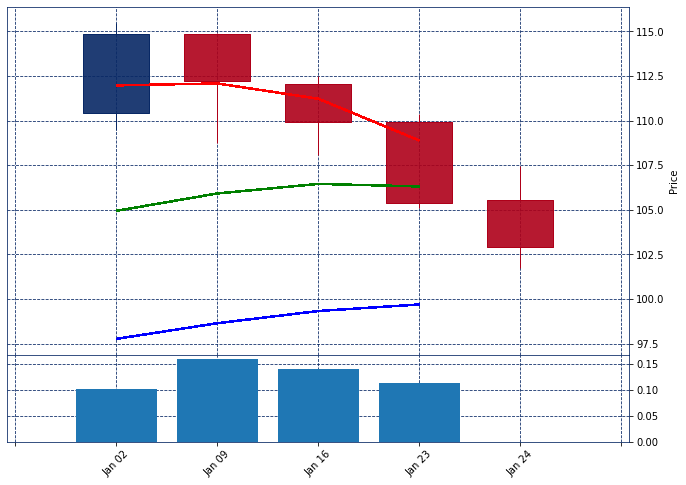

,Open,High,Low,Close,EMA4,EMA14,EMA32,labels,prediction,TwitterSentiment,Datetime,profit,trade
In,,,,,,,,,,,,,
35,110.410004,115.489998,109.489998,114.839996,111.976617,104.939982,97.759814,nn,nn,0.1013,2023-01-02,1.47037,1
36,114.879997,114.930000,108.750000,112.250000,112.085970,105.914651,98.638007,nn,nn,0.1597,2023-01-09,1.47037,1
37,112.029999,112.489998,108.099998,109.940002,111.227583,106.451364,99.322976,nn,nn,0.1402,2023-01-16,1.47037,1
38,109.930000,110.360001,105.110001,105.379997,108.888549,106.308516,99.690068,nn,nn,0.1138,2023-01-23,1.47037,1
39,105.570000,107.440002,101.750000,102.940002,112.085970,105.914651,98.638007,107.440002,107.04037,0.0000,2023-01-24,1.47037,1


In [15]:
#trade = 4
from plotting import PlotTrade

df = PlotTrade(trade=trade,trades_df=trades_df,window_size=window_size,entry_candle=entry_candle,
budget=budget,sentiment=sentiment,indicator1=indicator1,indicator2=indicator2,indicator3=indicator3)
trade += 1
df


In [16]:
from final_evaluation import GetPerformanceReport

GetPerformanceReport = GetPerformanceReport()

GetPerformanceReport.fit(entry_candle="Current Open",#entry_candle,#
                        budget=10000,
                        window_size=window_size,
                        export_excel=True,
                        excel_path = excel_reports)

trades_df_final = GetPerformanceReport.transform(trades_df)
#trades_df_final = trades_df_final.sort_values('Datetime', ascending=True)
trades_df_final.tail(10)

--------> GetPerformanceReport completed



,Open,High,Low,Close,EMA4,EMA14,EMA32,labels,prediction,TwitterSentiment,Datetime,profit,trade,Entry,Performance
40,105.949997,114.169998,105.570000,112.330002,108.538031,107.250900,103.276744,nn,nn,0.0,2023-04-03,0.172480,9,nn,nn
41,112.959999,116.169998,111.169998,115.309998,111.246818,108.325447,104.006032,nn,nn,0.0,2023-04-10,0.172480,9,nn,nn
42,115.690002,116.449997,113.000000,115.370003,112.896092,109.264721,104.694758,nn,nn,0.0,2023-04-17,0.172480,9,nn,nn
43,115.639999,116.860001,110.660004,115.470001,113.925656,110.092092,105.347803,nn,nn,0.0,2023-04-24,0.172480,9,nn,nn
44,115.800003,119.650002,115.269997,117.680000,111.246818,108.325447,104.006032,119.650002,115.972483,0.0,2023-04-25,0.172480,9,115.800003,15.0
45,115.800003,119.650002,115.269997,117.680000,115.427393,111.103813,106.095209,nn,nn,0.0,2023-05-01,2.389999,10,nn,nn
46,117.080002,118.629997,116.379997,117.139999,116.112436,111.908638,106.764590,nn,nn,0.0,2023-05-08,2.389999,10,nn,nn
47,117.139999,117.739998,113.330002,115.489998,115.863461,112.386152,107.293403,nn,nn,0.0,2023-05-15,2.389999,10,nn,nn
48,115.480003,117.080002,110.650002,111.070000,113.946076,112.210665,107.522287,nn,nn,0.0,2023-05-22,2.389999,10,nn,nn
49,110.129997,112.730003,108.470001,112.519997,116.112436,111.908638,106.764590,112.730003,112.941254,0.0,2023-05-23,2.389999,10,110.129997,217.0


<b>Plot Chart With Labels and Predictions</b>

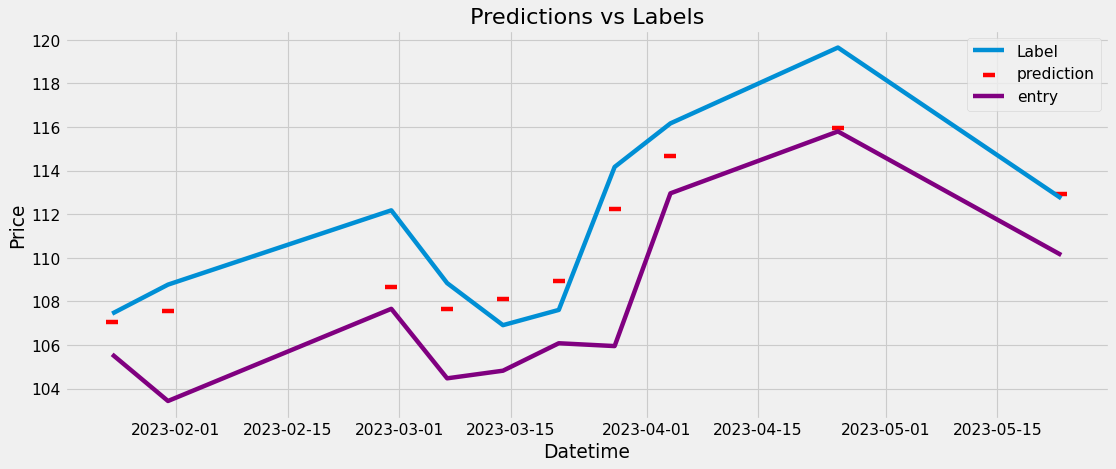

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
figure(figsize=(15, 6), dpi=80)

df_plot = trades_df_final[['Datetime','labels','prediction','Entry']]
df_plot = df_plot[df_plot.labels != 'nn']

x1 = df_plot['labels']
x2 = df_plot['prediction']
entry = df_plot['Entry']
y = df_plot['Datetime']

# plot lines
plt.plot(y, x1, label = "Label") #,s=200,marker='*'
plt.scatter(y, x2, label = "prediction",color='red', s=100,marker='_')
plt.plot(y, entry, label = "entry",color='purple')#,color='blue', s=100,marker=0
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.title('Predictions vs Labels')
plt.legend()
plt.show()

<b>Export dataframe with all variables</b>

In [18]:

def ExportFile():
    today = datetime.today().date()

    variables_dict = \
    {
    'model_name':[model_name_],
    'Date':[today],
    'ticker':[ticker],
    'period':[period],
    'api_key':[api_key],
    'sentiment':[sentiment],
    'sentiment_type':[sentiment_type],
    'aggr_function':[aggr_function],
    'formation_window':[formation_window],
    'target_window':[target_window],
    'split_ratio':[split_ratio],
    'test_ratio':[test_ratio],
    'validation_ratio':[validation_ratio],
    'condition':[condition],
    'indicator1':[indicator1],
    'indicator2':[indicator2],
    'indicator3':[indicator3],
    'window_size':[window_size],
    'formation_window':[formation_window],
    'twitter':[twitter],
    'start_date':[start_date],
    'end_date':[end_date],
    'batch_size_train':[batch_size_train],
    'batch_size_valid':[batch_size_valid],
    'shuffle':[shuffle],
    'entry_candle':[entry_candle],
    'excel_reports':[excel_reports],
    'acceptance':[acceptance],
    'penalization':[penalization],
    'learning_rate':[learning_rate],
    'test_set_start':[test_trade_start]
    }

    x_test.to_csv(f'{temp}/{ticker}_test_data.csv')
    x_test_x.to_csv(f'{temp}/{ticker}_x_test_x.csv')
    test_start = len(Dates)-x_test.shape[0]
    Dates_test = Dates[test_start:]
    Dates_test.to_csv(f'{temp}/{ticker}_dates_test.csv')
    Dates.to_csv(f'{temp}/{ticker}_Dates.csv')
    df = pd.DataFrame(variables_dict).transpose()
    df.to_csv(f'{temp}/variables_df.csv')
    return df

df = ExportFile()
#df


In [19]:
from final_evaluation import MakeSinglePrediction


MakeSinglePrediction = MakeSinglePrediction()

print('penalization: ',penalization)
print('acceptance: ',acceptance)
fit_output = MakeSinglePrediction.fit(
                        model_name=model_name,
                        form_window=formation_window,
                        ticker=ticker,
                        start_date=start_date,
                        end_date="2023-06-16",
                        interval=period, #1wk
                        progress=False,
                        condition=condition,
                        timeperiod1=indicator1,
                        timeperiod2=indicator2,
                        timeperiod3=indicator3,
                        debug=False,
                        budget=10000,
                        penalization=penalization,
                        acceptance=acceptance,
                        entry_candle='Current Close',
                        news_df=news_df,
                        sentiment=sentiment,
                        sentiment_type=sentiment_type,
                        sentiment_aggr=aggr_function)

#fit method outputs tuple, get only trade formation out of tuple
trade_formation = fit_output[1]
final_trade_formation = trade_formation.tail(formation_window)
final_trade_formation
###IMPORTANT!!!!
#trade_formation dataframe must be checked before transformation, sometimes df pulled via yahoo finance 
# is shifted, and trade formation does not have entire formation in itself. in this case there must 
# be changed end_date in fit method

#final_trade_formation.tail()


penalization:  1
acceptance:  0


,Date,Open,High,Low,Close,EMA4,EMA14,EMA32,TwitterSentiment
1,2023-05-22,115.480003,117.080002,110.650002,111.070000,113.946076,112.210665,107.522287,0.095343
2,2023-05-29,110.129997,112.730003,108.470001,112.519997,113.375644,112.251909,107.825179,0.098857
3,2023-06-05,113.000000,114.480003,106.870003,110.709999,112.309386,112.046321,108.000016,0.130471
4,2023-06-12,110.190002,110.989998,108.050003,109.400002,111.145632,111.693479,108.084864,0.081214



Ticker:  mrk
1/1 [==============================] - 3s 3s/step

Entry candle (Current Close)

Budget:  10000

Entry price:  109.4
Prediction:  114.04
Expected Market move:  4.64
Expected Profit:  422.64


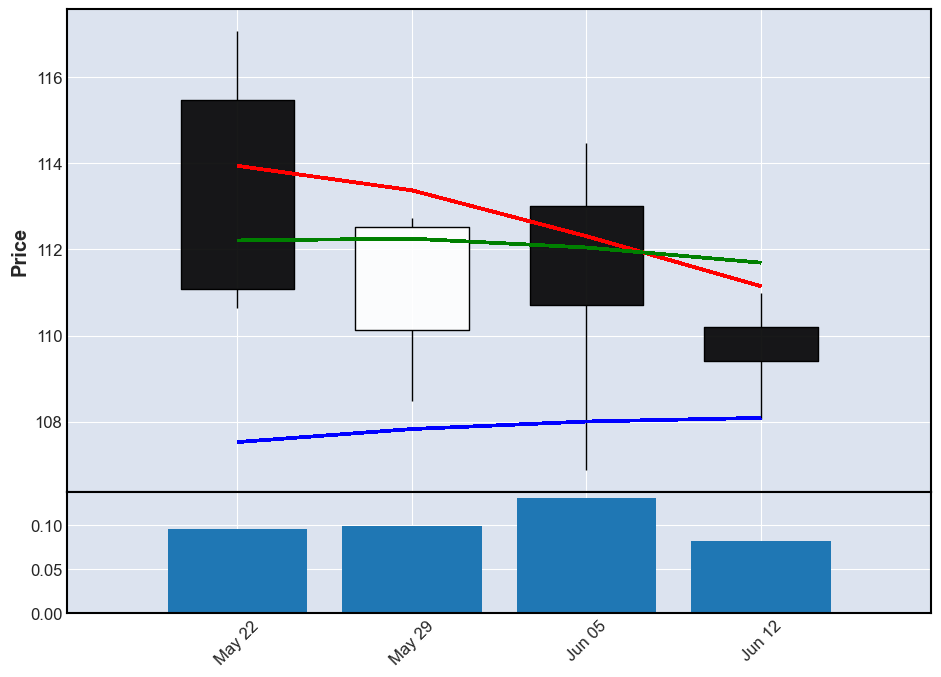

In [20]:
#Make prediction
MakeSinglePrediction.transform(final_trade_formation)

#PLot current chart and sentiment
from plotting import PlotCurrentFormation

PlotCurrentFormation(final_trade_formation,sentiment=sentiment,indicator1=indicator1,indicator2=indicator2,indicator3=indicator3)
